# 전국 신규 민간 아파트 분양가격 동향

* 수치형 데이터와 범주형 데이터
* barplot, lineplot, scatterplot, lmplot, heatmap, boxplot, swarmplot, hist 실습
* 사용할 데이터셋: https://www.data.go.kr/dataset/3035522/fileData.do
* 공공데이터인 주택도시보증공사_전국 평균 분양가격(2019년 12월)

In [2]:
# 판다스 라이브러리 로드
import pandas as pd

In [3]:
# 시각화를 위한 폰트 설정
# 한글 폰트를 사용하기 위해 matplotlib 라이브러리 로드
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

<AxesSubplot:title={'center':'한글'}>

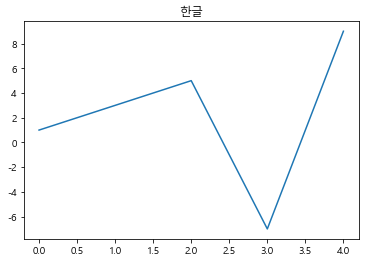

In [4]:
# 폰트 확인
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

# 데이터 로드

In [5]:
# 엑셀로 저장된 한글의 인코딩은 보통 cp949로 지정해주는 것이 좋다
# 물론 euc-kr로 인코딩 가능하지만 cp949가 더 많은 한글을 지원한다
# 최근 분양가 파일을 df_last 변수에 넣기
df_last = pd.read_csv("data/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv", encoding = "cp949")
df_last.shape

(4335, 5)

In [6]:
# 파일 미리보기
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [7]:
df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


# 2015년부터 최근까지의 데이터를 로드
* 전국 평균 분양가격(2013.09 ~ 2015.08까지) 파일을 불러와 df_first 변수에 담기

In [8]:
# 해당되는 폴더 혹은 경로의 파일 목록 출력
import os

for root, dirs, files in os.walk("data"):
    print(files)

['mpg.csv', 'pandas.csv', 'seoul-covid19-2021-01-03.csv', 'seoul-covid19-2021-06-14.csv', '소상공인시장진흥공단_상가업소정보_의료기관_201909.csv', '전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', '주택도시보증공사_전국 평균 분양가격(2019년 12월).csv']


In [9]:
df_first = pd.read_csv("data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv", encoding = "cp949")
df_first.shape

(17, 22)

In [10]:
# 파일 미리보기
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [12]:
df_first.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


In [13]:
# 데이터 요약
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


# 결측치
* isnull 또는 isna를 통해 결측치를 확인할 수 있다
* 결측치는 True로 표시되고, True == 1이기 때문에 이 값을 모두 더해주면 결측치의 수를 알 수 있다

In [14]:
# 결측치 확인
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

# 데이터 타입 변경
* 문자열 데이터를 수치 데이터로 변경해주려면 pd.to_numeric을 이용하면 된다
* df_last 데이터의 경우 분양가격이 object(문자)타입으로 되어있기 때문에 수치 데이터로 변경해주어야 한다

In [15]:
df_last["분양가격"] = pd.to_numeric(df_last["분양가격(㎡)"], errors='coerce')
df_last["분양가격"].head()

0    5841.0
1    5652.0
2    5882.0
3    5721.0
4    5879.0
Name: 분양가격, dtype: float64

# 평당분양가격 구하기
* 분양가격을 평당기준으로 보기 위해 3.3을 곱해서 '평당분양가격' 컬럼 추가해주기

In [17]:
df_last["평당분양가격"] = df_last["분양가격"] * 3.3
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3


# 분양가격 요약하기

In [19]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [20]:
# 변경전 컬럼의 분양가격(㎡) 컬럼 요약
df_last["분양가격(㎡)"].describe()

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [21]:
# 수치데이터로 변경된 평당분양가격 컬럼 요약
df_last["평당분양가격"].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

# 규모구분 -> 전용면적 컬럼으로 변경
* '전용면적'이라는 새로운 컬럼을 만들어주고
* 기존 규모구분의 값에서 전용면적, 초과, 이하 등의 문구를 빼기 (str의 replace 이용)
* str.replace와 replace의 차이점? : str.replace는 설정값이 완벽하게 일치하지 않아도 포함된 값을 바꿔주지만 replace는 설정값이 완벽하게 일치해야 바뀐다

In [22]:
# 규모구분의 unique 값 보기
df_last["규모구분"].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [23]:
# 규모구분을 전용면적으로 변경
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적", "")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과", "~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하", "")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ", "")
df_last["전용면적"]

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

# 필요없는 컬럼 제거
* drop을 통해 전처리 해준 컬럼을 제거
* 필요없는 컬럼은 메모리 사용량을 위해 제거해주는 것이 좋다
* axis 옵션(pandas의 데이터프레임과 관련된 옵션): axis = 1은 열, axis = 0은 행을 기준으로 처리한다. 기본적으로 default값은 axis=0이다.

In [25]:
# 정보
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
 7   전용면적     4335 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 271.1+ KB


In [26]:
# drop 사용해서 필요없는 컬럼 삭제
df_last = df_last.drop(["분양가격(㎡)", "분양가격"], axis=1)

In [27]:
# 제거되었는지 확인
df_last.head()

,지역명,규모구분,연도,월,평당분양가격,전용면적
0,서울,전체,2015,10,19275.3,전체
1,서울,전용면적 60㎡이하,2015,10,18651.6,60㎡
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,19410.6,60㎡~85㎡
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,18879.3,85㎡~102㎡
4,서울,전용면적 102㎡초과,2015,10,19400.7,102㎡~


In [28]:
# 컬럼 제거를 통한 메모리 사용량 알아보기
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     4335 non-null   object 
 1   규모구분    4335 non-null   object 
 2   연도      4335 non-null   int64  
 3   월       4335 non-null   int64  
 4   평당분양가격  3957 non-null   float64
 5   전용면적    4335 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 203.3+ KB


# Groupby를 이용해 데이터 집계

<AxesSubplot:xlabel='지역명'>

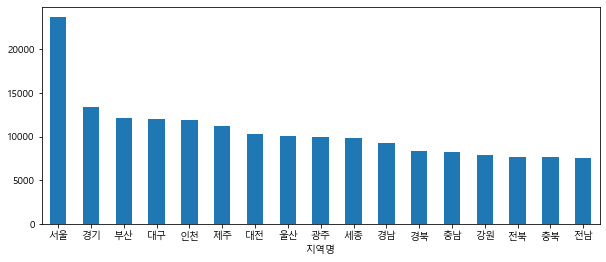

In [33]:
# 지역별 분양가격의 평균을 구하고 막대그래프로 시각화
mean_price = df_last.groupby(["지역명"])["평당분양가격"].mean().sort_values(ascending=False)
mean_price.plot.bar(rot=0, figsize=(10, 4))

In [34]:
# 전용면적별 분양가격의 평균
df_last.groupby(["전용면적"])["평당분양가격"].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

<AxesSubplot:title={'center':'전용면적별 평당분양가격'}, ylabel='전용면적'>

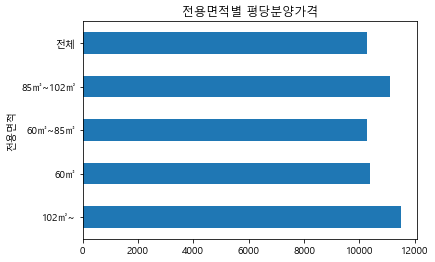

In [36]:
# 전용면적별 분양가격의 평균의 시각화
df_last.groupby(["전용면적"])["평당분양가격"].mean().plot.barh(title = "전용면적별 평당분양가격")

In [37]:
# 지역별, 전용면적별 평당분양가격의 평균
df_last.groupby(["지역명", "전용면적"])["평당분양가격"].mean()

지역명  전용면적    
강원   102㎡~       8311.380000
     60㎡         7567.098000
     60㎡~85㎡     7485.588000
     85㎡~102㎡    8749.557143
     전체          7477.536000
                    ...     
충북   102㎡~       8195.352000
     60㎡         7103.118000
     60㎡~85㎡     7264.488000
     85㎡~102㎡    8391.306000
     전체          7219.014000
Name: 평당분양가격, Length: 85, dtype: float64

In [43]:
# 행, 열 바꾸기
g = df_last.groupby(["지역명", "전용면적"])["평당분양가격"].mean().unstack()
g.head()

전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,전체
지역명,,,,,
강원,8311.380000,7567.098000,7485.588,8749.557143,7477.536
경기,14771.790000,13251.744000,12523.566,13677.774000,12559.602
경남,10358.363265,8689.175000,8618.676,10017.612000,8658.672
경북,9157.302000,7883.172000,8061.372,8773.814634,8078.532
광주,11041.532432,9430.666667,9910.692,9296.100000,9903.630


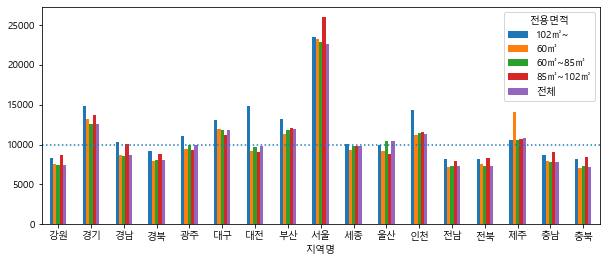

In [46]:
# 시각화
g.plot.bar(rot=0, figsize=(10, 4))
plt.axhline(10000, linestyle=":")

# matplotlib.pyplot 모듈의 함수 axhline, axvline (수평선, 수직선)

In [48]:
# 연도, 지역별 평당분양가격의 평균
g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean().unstack()
g

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.94,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400,20315.680,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800
2016,7162.903846,11684.97,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535,21753.435,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335
2017,7273.560000,12304.98,8786.760000,8280.800000,9613.977551,12206.700000,9957.158491,11560.680,21831.060,9132.505556,10666.935714,11640.600000,7372.920000,7398.973585,12566.730000,8198.422222,7473.120
2018,8219.255000,14258.42,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965,23202.245,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295
2019,8934.475000,15665.54,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865,28286.830,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875


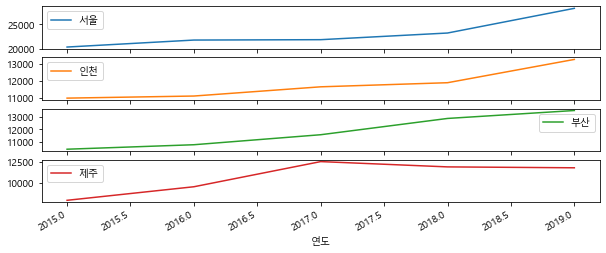

In [56]:
# 서브플롯으로 시각화
_ = g[["서울", "인천", "부산", "제주"]].plot(subplots=True, figsize=(10, 4))

<AxesSubplot:xlabel='연도'>

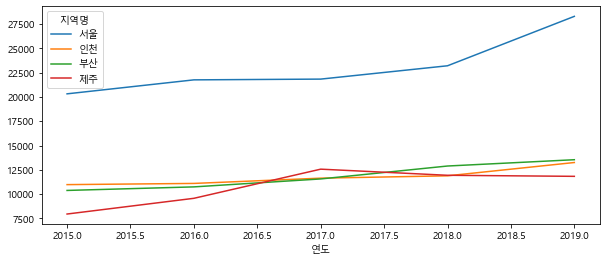

In [57]:
# 한번에 볼 수도 있다
g[["서울", "인천", "부산", "제주"]].plot(figsize=(10, 4))

# pivot table로 데이터 집계하기
* 앞에 groupby로 작업했던 것들을 pivot_table로 똑같이 할 수 있다

In [58]:
# 지역명을 index, 평당분양가격을 values로 구하기
pd.pivot_table(data=df_last, index="지역명", values="평당분양가격")

,평당분양가격
지역명,
강원,7890.750000
경기,13356.895200
경남,9268.778138
경북,8376.536515
광주,9951.535821
대구,11980.895455
대전,10253.333333
부산,12087.121200
서울,23599.976400


In [59]:
# 전용면적별 평당분양가격
pd.pivot_table(data=df_last, index="전용면적", values="평당분양가격")

,평당분양가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [60]:
# 지역별, 전용면적별 평당분양가격
pd.pivot_table(data=df_last, index="전용면적",columns="지역명", values="평당분양가격")

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.380000,14771.790,10358.363265,9157.302000,11041.532432,13087.338000,14876.871429,13208.250,23446.038,10106.976000,9974.448000,14362.030435,8168.4900,8193.57000,10522.787234,8689.169388,8195.352
60㎡,7567.098000,13251.744,8689.175000,7883.172000,9430.666667,11992.068000,9176.475000,11353.782,23212.794,9323.927027,9202.106897,11241.318000,7210.1700,7609.93200,14022.221053,7911.156000,7103.118
60㎡~85㎡,7485.588000,12523.566,8618.676000,8061.372000,9910.692000,11778.690000,9711.372000,11864.820,22786.830,9775.458000,10502.531707,11384.406000,7269.2400,7271.35200,10621.314000,7818.954000,7264.488
85㎡~102㎡,8749.557143,13677.774,10017.612000,8773.814634,9296.100000,11140.642857,9037.430769,12072.588,25943.874,9847.926000,8861.007692,11527.560000,7908.8625,8275.78125,10709.082353,9120.045000,8391.306
전체,7477.536000,12559.602,8658.672000,8078.532000,9903.630000,11771.298000,9786.018000,11936.166,22610.346,9805.422000,10492.712195,11257.026000,7283.5620,7292.60400,10784.994000,7815.324000,7219.014


In [61]:
# 연도, 지역별 평당분양가격
pd.pivot_table(data=df_last, index="연도",columns="지역명", values="평당분양가격")

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.94,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400,20315.680,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800
2016,7162.903846,11684.97,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535,21753.435,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335
2017,7273.560000,12304.98,8786.760000,8280.800000,9613.977551,12206.700000,9957.158491,11560.680,21831.060,9132.505556,10666.935714,11640.600000,7372.920000,7398.973585,12566.730000,8198.422222,7473.120
2018,8219.255000,14258.42,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965,23202.245,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295
2019,8934.475000,15665.54,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865,28286.830,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875


# 최근 데이터 시각화
* Seaborn으로 시각화
* barplot, catplot, lineplot, relplot, boxplot, violinplot, lmplot, swarmplot 등

In [62]:
# seaborn 라이브러리 로드
import seaborn as sns

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

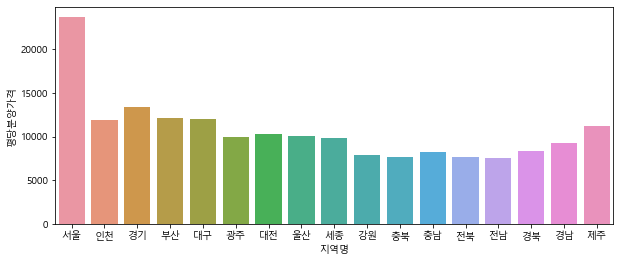

In [65]:
# barplot으로 지역별 평당분양가격 그리기
plt.figure(figsize=(10, 4))
sns.barplot(data=df_last, x="지역명", y="평당분양가격", ci=None)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

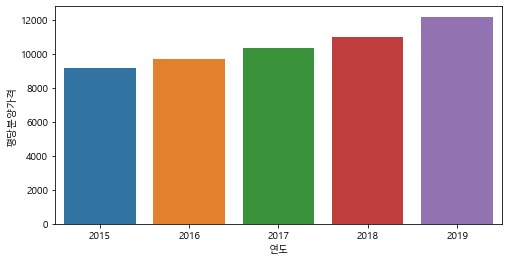

In [67]:
# barplot으로 연도별 평당분양가격 그리기
plt.figure(figsize=(8, 4))
sns.barplot(data=df_last, x="연도", y="평당분양가격", ci=None)

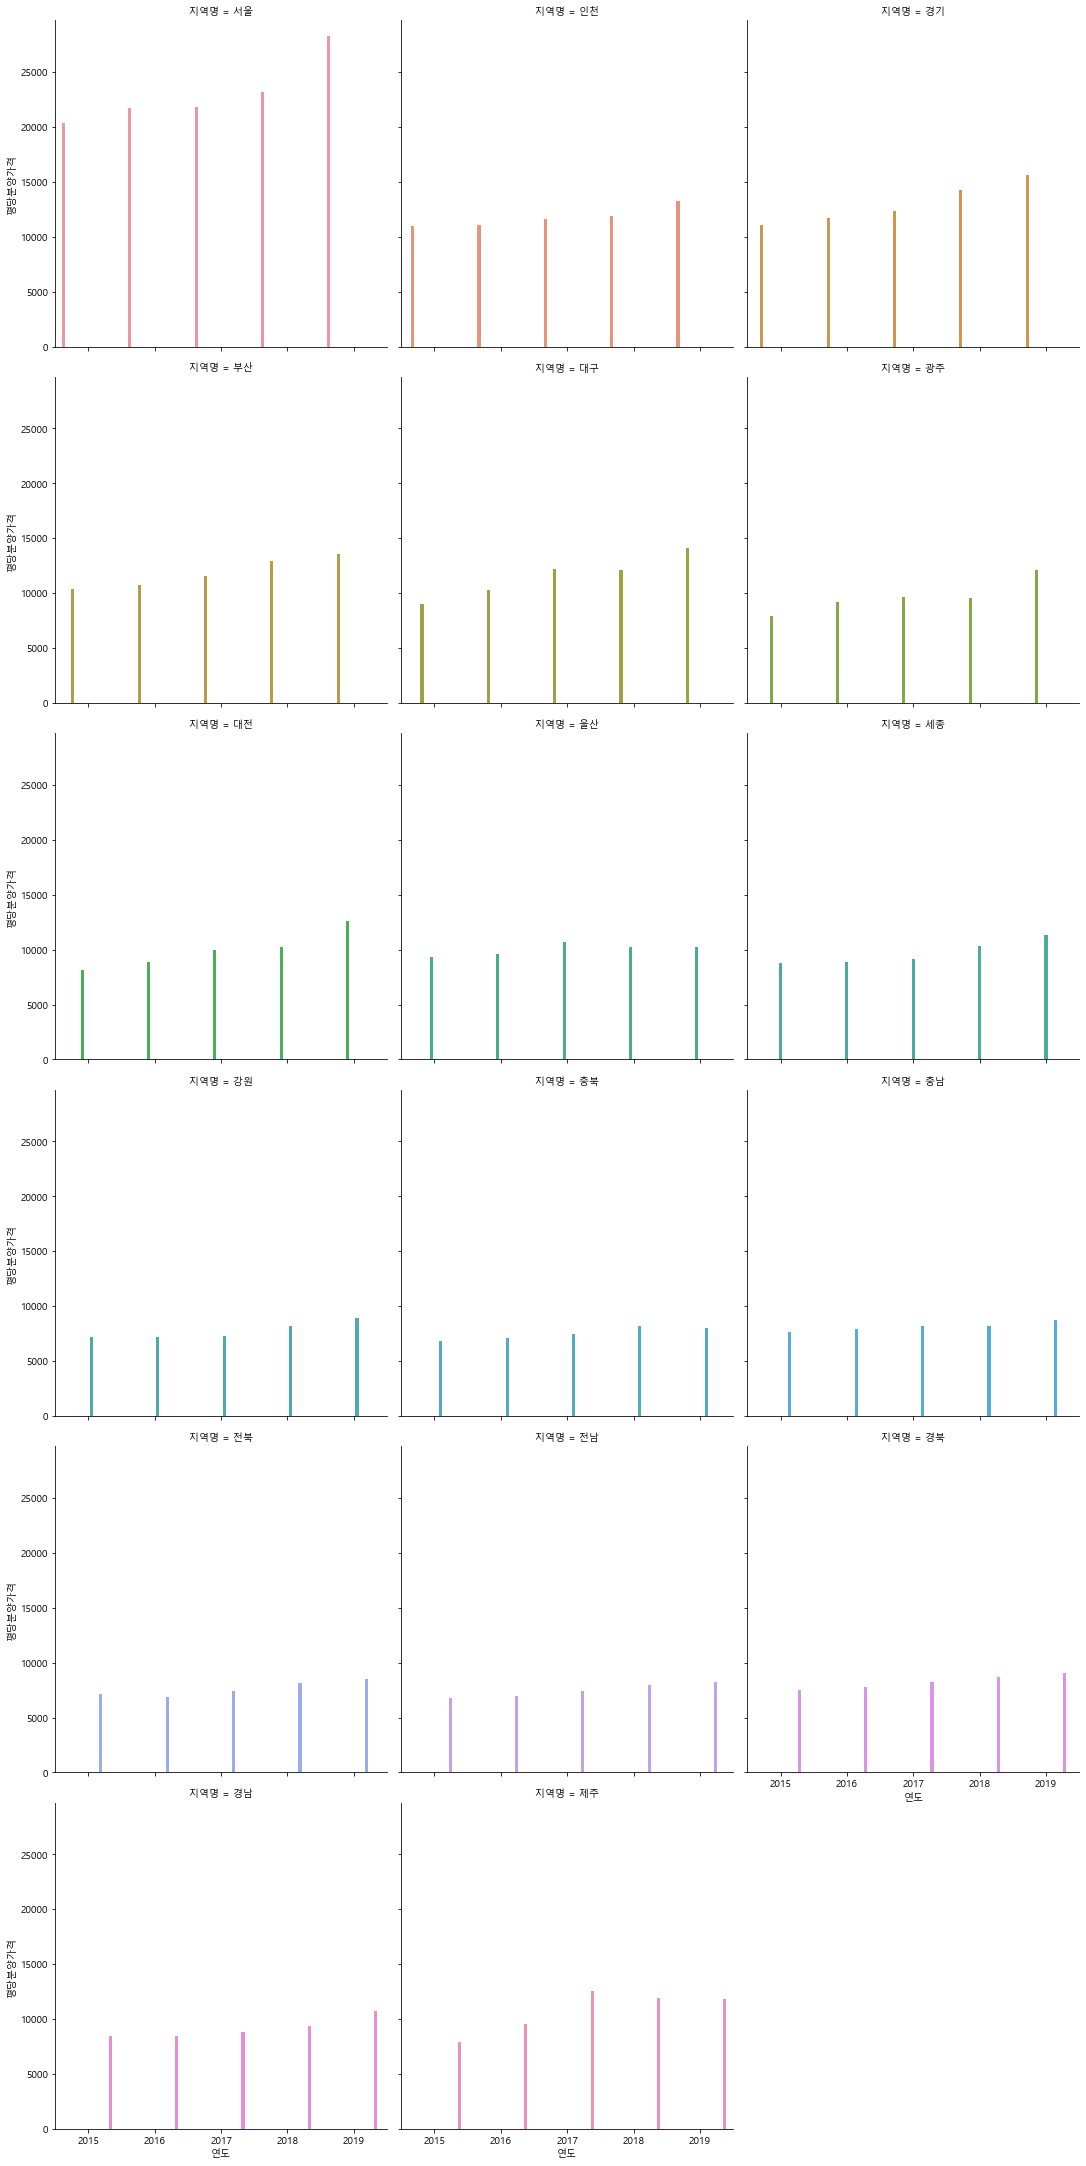

In [68]:
# catplot으로 서브플롯 그리기
sns.catplot(data=df_last, x="연도", y="평당분양가격", kind="bar",
           ci=None, hue="지역명", col="지역명", col_wrap=3)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

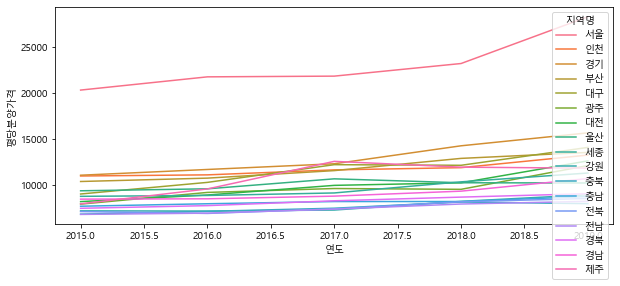

In [70]:
# lineplot으로 연도별 평당분양가격 그리기
# hue 옵션을 통해 지역별로 다르게 표시
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_last, x="연도", y="평당분양가격", hue="지역명",
            ci=None)

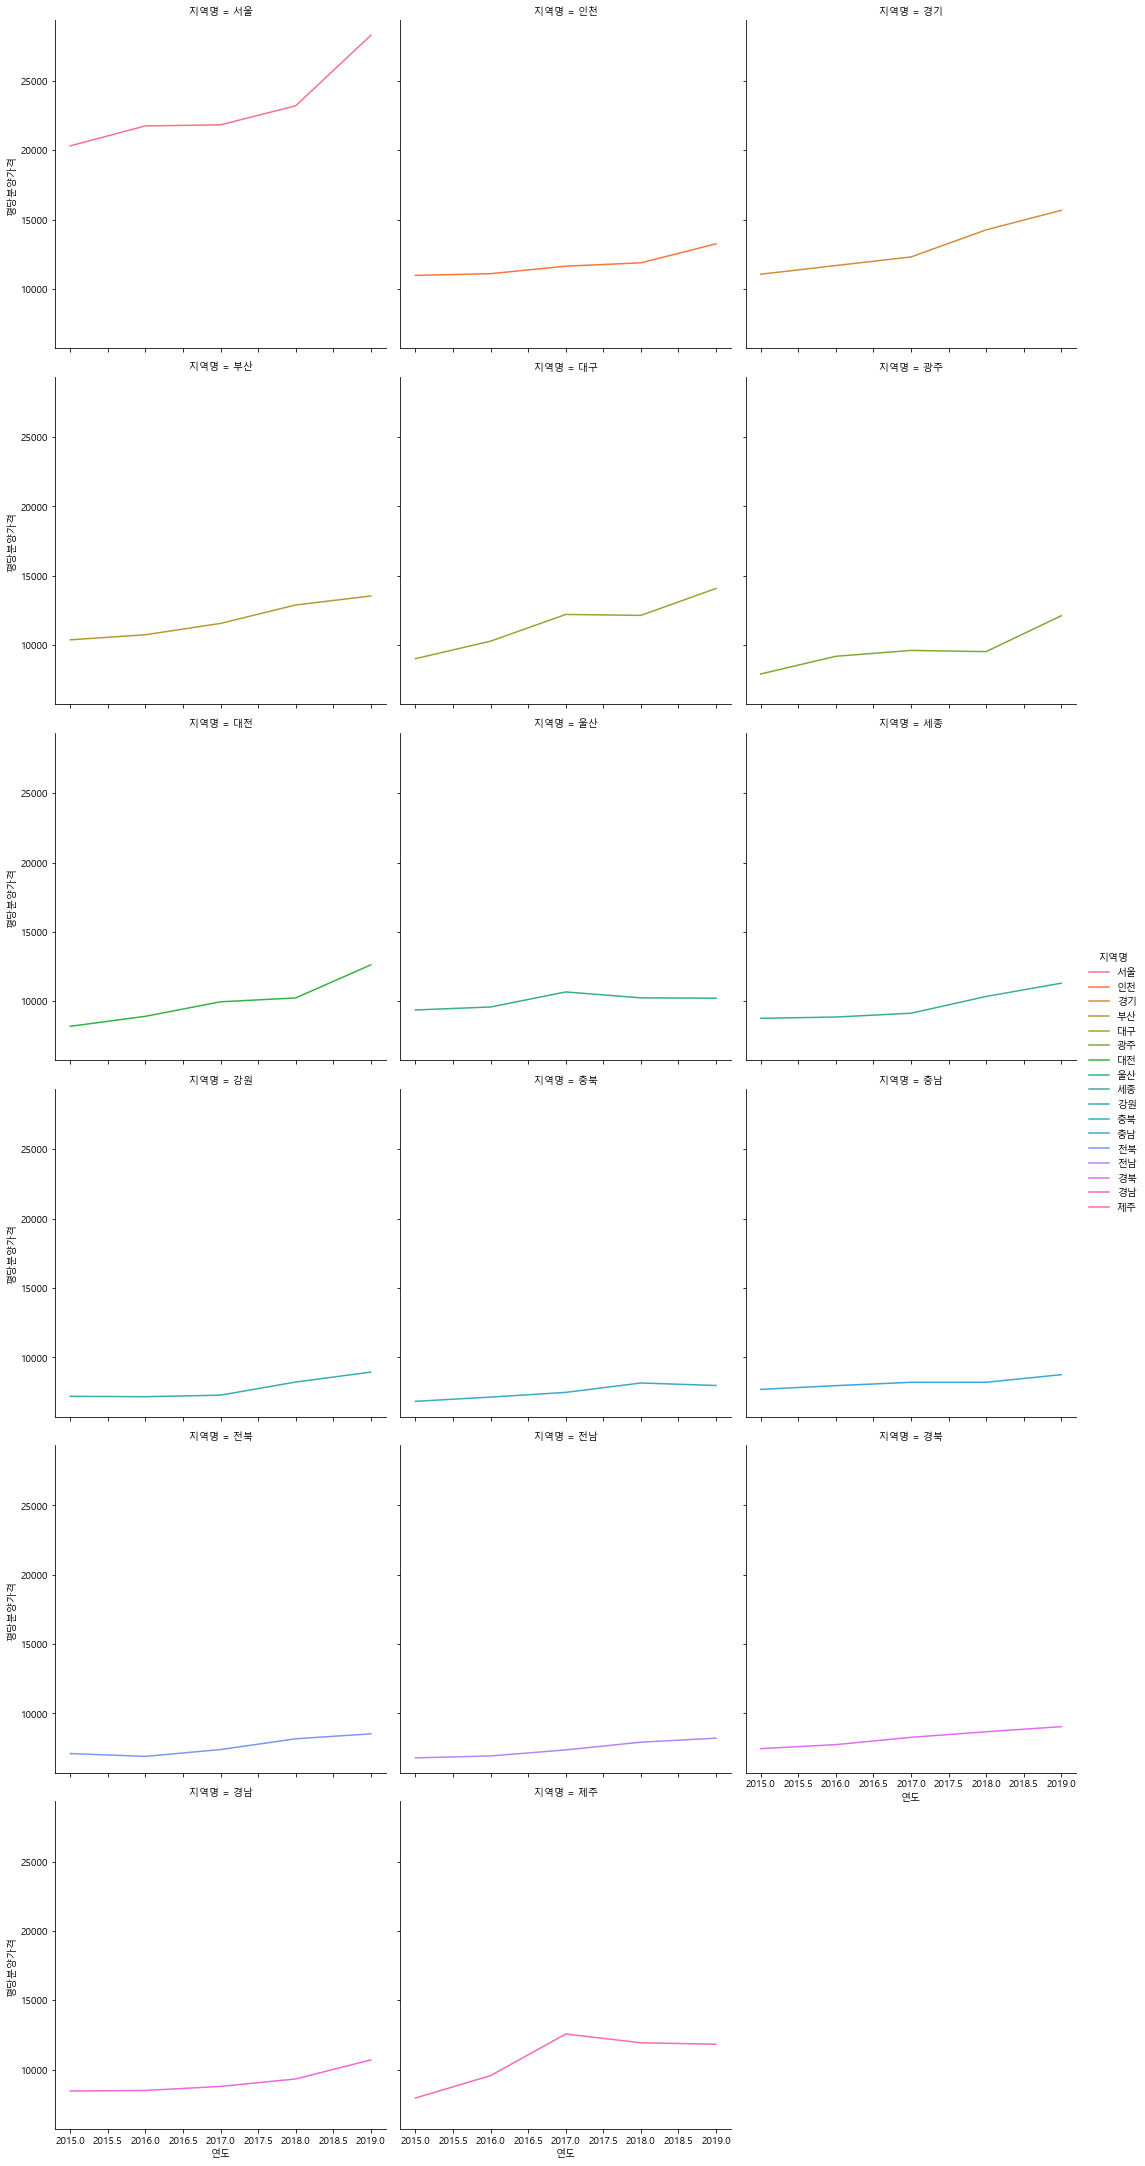

In [71]:
# relplot으로 서브플롯 그리기
sns.relplot(data=df_last, x="연도", y="평당분양가격", kind="line",
           ci=None, col="지역명", hue="지역명", col_wrap=3)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

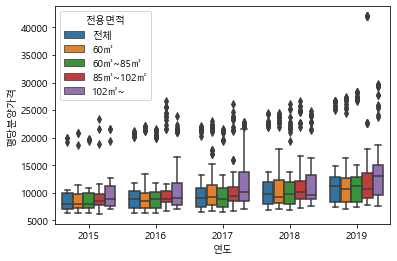

In [73]:
# boxplot과 violinplot
# 연도별 평당분양가격을 boxplot으로 그리기
sns.boxplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

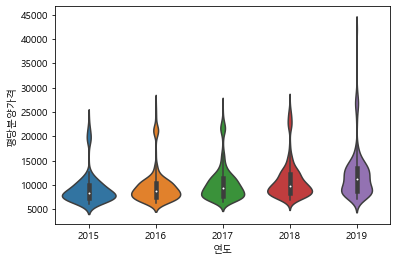

In [74]:
# 연도별 평당분양가격의 violinplot
sns.violinplot(data=df_last, x="연도", y="평당분양가격")

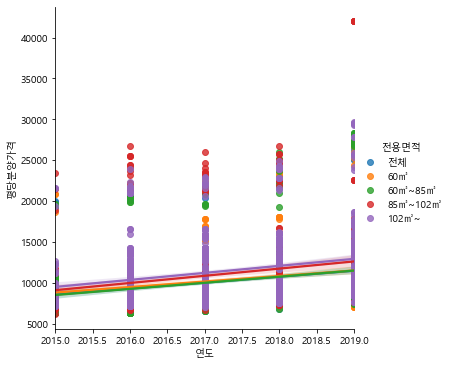

In [77]:
# lmplot과 swarmplot
# 연도별 평당분양가격을 lmplot으로 그려보기
sns.lmplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

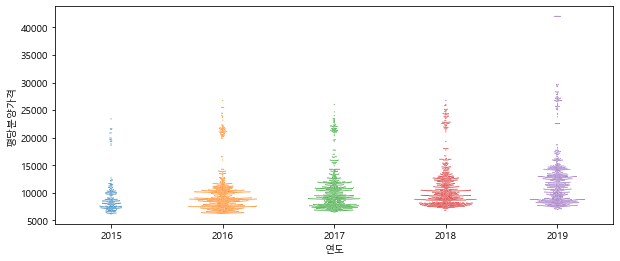

In [82]:
# 연도별 평당분양가격을 swarmplot으로 그려보기
# swarmplot은 범주형(카테고리) 데이터의 산점도를 표현하기 용이하다
plt.figure(figsize=(10, 4))
sns.swarmplot(data=df_last, x="연도", y="평당분양가격", size=1)

# 이상치 보기
* 위의 시각화를 통해 보았더니 서울의 평당분양가격이 특히 높은데이터가 있다. (40000을 넘는)

In [88]:
df_last[df_last["평당분양가격"] > 40000]

,지역명,규모구분,연도,월,평당분양가격,전용면적
3743,서울,전용면적 85㎡초과 102㎡이하,2019,6,42002.4,85㎡~102㎡
3828,서울,전용면적 85㎡초과 102㎡이하,2019,7,42002.4,85㎡~102㎡
3913,서울,전용면적 85㎡초과 102㎡이하,2019,8,42002.4,85㎡~102㎡
3998,서울,전용면적 85㎡초과 102㎡이하,2019,9,42002.4,85㎡~102㎡
4083,서울,전용면적 85㎡초과 102㎡이하,2019,10,42002.4,85㎡~102㎡
4168,서울,전용면적 85㎡초과 102㎡이하,2019,11,42002.4,85㎡~102㎡
4253,서울,전용면적 85㎡초과 102㎡이하,2019,12,42002.4,85㎡~102㎡


# 수치데이터의 히스토그램 그리기

array([[<AxesSubplot:title={'center':'연도'}>,
        <AxesSubplot:title={'center':'월'}>],
       [<AxesSubplot:title={'center':'평당분양가격'}>, <AxesSubplot:>]],
      dtype=object)

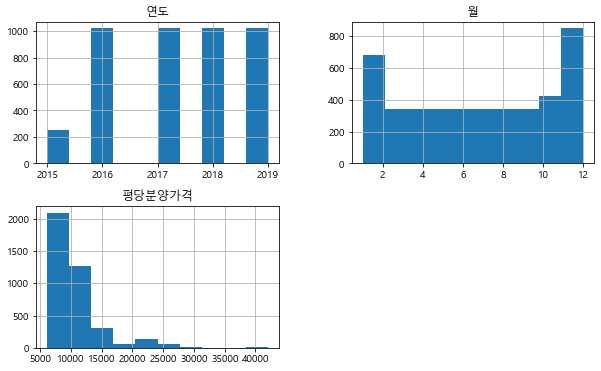

In [89]:
df_last.hist(figsize=(10, 6))

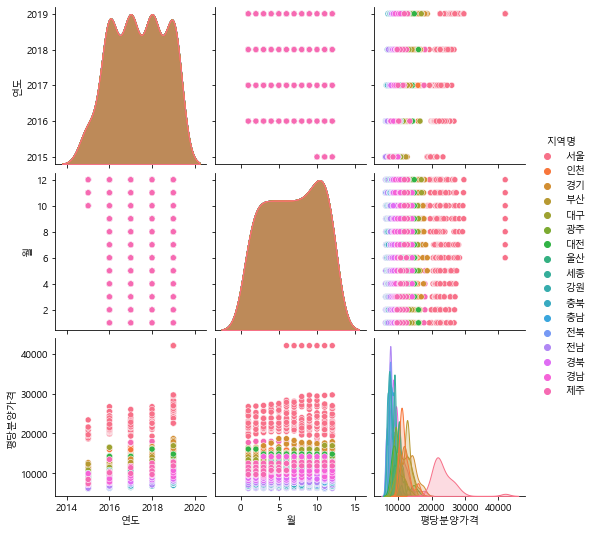

In [90]:
# pairplot(여러 변수간 산점도)
# pairplot은 grid형태로 각 집합의 조합에 대해 히스토그램과 분포도를 그린다
# 즉, 데이터에 들어있는 각 컬럼들의 모든 상관관계를 출력해준다고 볼 수 있다
sns.pairplot(data=df_last, hue="지역명")

# 2015년 8월 이전 데이터 보기

In [91]:
# 모든 컬럼이 출력되게 설정
pd.options.display.max_columns = None

In [92]:
# 확인
df_first

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,8048,8038,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,8493,8627,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,10501,10397,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,8282,8527,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,6419,6631,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [94]:
# 미리보기
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [95]:
# 정보
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [96]:
# 결측치 확인
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

# melt로 tidy data 만들기
* pandas의 melt를 사용하면 데이터의 형태를 변경할 수 있다
* df_first 데이터와 df_last 데이터를 합치려면 형태를 같게 만들어줘야 한다
* 데이터를 병합하기 위해 melt를 사용해 열에 있는 데이터를 행으로 녹여준다

In [98]:
# 데이터 미리보기
df_first.head(2)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


In [99]:
# 녹인 데이터는 df_first_melt 변수에 할당
df_first_melt = pd.melt(df_first, id_vars="지역")
df_first_melt

,지역,variable,value
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [100]:
# df_first_melt 변수에 담겨진 컬럼의 이름을 변경
df_first_melt.columns = ["지역명", "기간", "평당분양가격"]
df_first_melt.head(1)

,지역명,기간,평당분양가격
0,서울,2013년12월,18189


# 연도와 월 분리하기
* pandas의 string-handling 사용: https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [101]:
date = "2020년11월"
date

'2020년11월'

In [102]:
# split을 통해 "년"을 기준으로 텍스트 분리
date.split("년")

['2020', '11월']

In [103]:
# 리스트의 인덱싱을 사용해 연도만 가져오기
date.split("년")[0]

'2020'

In [104]:
# 리스트의 인덱싱을 사용해 월만 가져오기
date.split("년")[1]

'11월'

In [105]:
# replace를 사용해서 '월' 제거
date.split("년")[1].replace("월", "")

'11'

In [106]:
# 연도만 반환하는 parse_year 함수 만들기
# 반환하는 데이터는 int형이 되도록한다
def parse_year(date):
    year = date.split("년")[0]
    year = int(year)
    return year

In [107]:
# 함수 확인
parse_year(date)

2020

In [108]:
# 월만 반환하는 parse_month 함수
# 연도와 마찬가지로 반환하는 데이터가 int형이 되게 만든다
def parse_month(date):
    month = date.split("년")[1].replace("월", "")
    month = int(month)
    return month

In [109]:
# 함수 확인
parse_month(date)

11

In [110]:
# 함수를 사용해 연도만 추출, apply 활용해 새로운 컬럼에 담기
df_first_melt["연도"] = df_first_melt["기간"].apply(parse_year)
df_first_melt.head(1)

,지역명,기간,평당분양가격,연도
0,서울,2013년12월,18189,2013


In [113]:
# 함수를 사용해 월만 추출, apply 활용해 새로운 컬럼에 담기
df_first_melt["월"] = df_first_melt["기간"].apply(parse_month)
df_first_melt.head()

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


In [114]:
# 리스트 형태로 데이터의 컬럼 알아보기
df_first_melt.columns.tolist()

['지역명', '기간', '평당분양가격', '연도', '월']

In [115]:
df_last.head(1)

,지역명,규모구분,연도,월,평당분양가격,전용면적
0,서울,전체,2015,10,19275.3,전체


In [118]:
cols = ['지역명', '연도', '월', '평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [119]:
# 데이터를 병합하기 위해서는 df_last, df_first_melt 두 데이터의 컬럼의 이름이 같아야 한다
# df_last에는 전용면적이 있다. 하지만 df_last의 이전 데이터에는 전용면적이 없기 때문에 "전체"에 해당하는 전용면적만 사용하기로 한다
# loc를 사용해 전체에 해당하는 면적만 copy로 복사해서 다른 변수에 담는다

df_last_prepare = df_last.loc[df_last["전용면적"] == "전체", cols]
df_last_prepare.head(1)

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3


In [120]:
# df_first_melt도 마찬가지로 위와 공통된 컬럼만 가져온 뒤
# df_first_prepare 변수에 담아 똑같은 형태를 만들어준다
df_first_prepare = df_first_melt[cols]
df_first_prepare.head(1)

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189


# concat으로 데이터 합치기

In [121]:
# 위에서 만든 df_last_prepare와 df_first_prepare을 합쳐준다
# pd.concat 사용. 리스트 형태로 넣어주기.
df = pd.concat([df_last_prepare, df_first_prepare])

In [122]:
# 데이터가 잘 합쳐졌는지 확인
df.shape

(1224, 4)

In [123]:
# 연도별로 데이터가 몇개씩 있는지 알아보기
df["연도"].value_counts()

2019    204
2018    204
2017    204
2016    204
2014    204
2015    187
2013     17
Name: 연도, dtype: int64

# pivot_table 사용

In [125]:
# 연도를 인덱스로, 지역명을 컬럼으로 평당분양가격을 피벗테이블로 그리기
g = pd.pivot_table(data=df, index="연도", columns="지역명", values="평당분양가격")
g.style.background_gradient()

# pandas의 style 기능
# 참고문서: https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.background_gradient.html

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2013,6230.000000,10855.000000,6473.000000,6168.000000,6098.000000,8080.000000,8321.000000,8111.000000,18189.000000,7601.000000,8090.000000,10204.000000,5678.000000,6282.000000,7674.000000,6365.000000,6589.000000
2014,6332.500000,10509.083333,6728.750000,6536.500000,7587.833333,8286.083333,8240.333333,9180.166667,18997.250000,8085.333333,8361.666667,10074.833333,5718.916667,6362.333333,7855.166667,6681.583333,6620.000000
2015,6831.154545,10489.109091,7646.163636,7035.063636,7956.090909,8706.718182,8104.509091,9633.272727,19282.600000,8641.227273,9273.336364,10276.845455,6109.263636,6623.290909,7465.327273,7024.490909,6699.572727
2016,7011.125000,11220.000000,7847.950000,7360.650000,8898.725000,10310.025000,8501.625000,10429.925000,20663.500000,8860.500000,10208.550000,10532.500000,6488.625000,6417.950000,9129.175000,7330.675000,6770.225000
2017,7126.800000,11850.000000,8119.800000,7794.900000,9463.500000,11455.800000,9044.700000,11577.900000,21375.900000,9135.300000,11345.100000,10736.700000,7187.700000,7057.800000,10830.900000,7456.200000,6762.600000
2018,7680.750000,13185.975000,9019.450000,8505.200000,9855.725000,12075.800000,10180.225000,12997.875000,22889.350000,10354.850000,10241.400000,11273.900000,7789.100000,7625.750000,11890.725000,8012.675000,7874.075000
2019,8141.650000,14468.850000,9870.850000,8856.650000,11822.800000,13852.025000,11777.700000,13116.400000,26131.050000,11078.925000,10022.100000,12634.875000,7902.400000,8196.650000,12137.950000,8606.950000,7574.600000


<AxesSubplot:xlabel='지역명', ylabel='연도'>

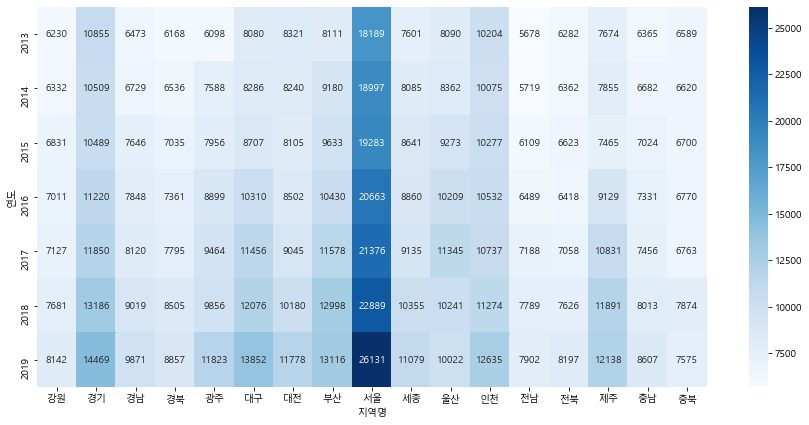

In [128]:
# 위의 피벗테이블을 히트맵으로 표현
plt.figure(figsize=(15, 7))
sns.heatmap(data=g, annot=True, cmap="Blues", fmt=".0f")

In [129]:
# Transpose 사용하여 행과 열 바꿔주기
g.T

연도,2013,2014,2015,2016,2017,2018,2019
지역명,,,,,,,
강원,6230.0,6332.500000,6831.154545,7011.125,7126.8,7680.750,8141.650
경기,10855.0,10509.083333,10489.109091,11220.000,11850.0,13185.975,14468.850
경남,6473.0,6728.750000,7646.163636,7847.950,8119.8,9019.450,9870.850
경북,6168.0,6536.500000,7035.063636,7360.650,7794.9,8505.200,8856.650
광주,6098.0,7587.833333,7956.090909,8898.725,9463.5,9855.725,11822.800
대구,8080.0,8286.083333,8706.718182,10310.025,11455.8,12075.800,13852.025
대전,8321.0,8240.333333,8104.509091,8501.625,9044.7,10180.225,11777.700
부산,8111.0,9180.166667,9633.272727,10429.925,11577.9,12997.875,13116.400
서울,18189.0,18997.250000,19282.600000,20663.500,21375.9,22889.350,26131.050


<AxesSubplot:xlabel='연도', ylabel='지역명'>

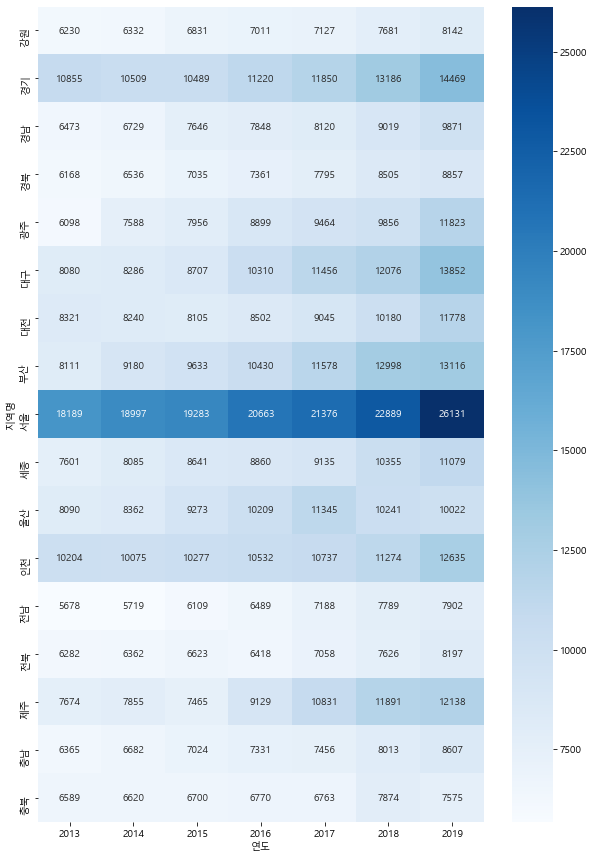

In [131]:
# 히트맵
plt.figure(figsize=(10, 15))
sns.heatmap(data=g.T, annot=True, cmap="Blues", fmt=".0f")

# 2013년부터 최근 데이터까지 시각화

In [ ]:
# 연도별 평당분양가격 보기

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

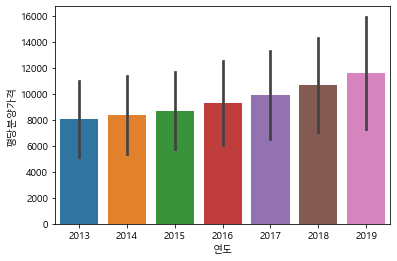

In [133]:
# barplot
sns.barplot(data=df, x="연도", y="평당분양가격", ci="sd")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

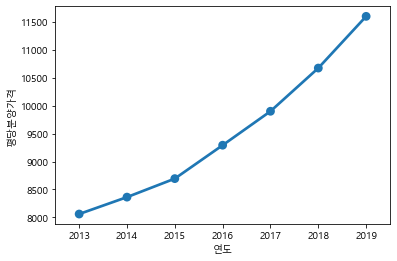

In [135]:
# pointplot으로 연도별 평당분양가격 그리기
sns.pointplot(data=df, x="연도", y="평당분양가격", ci=None)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

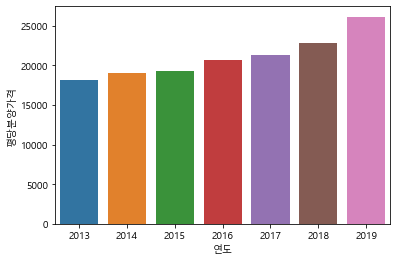

In [140]:
# 서울만 barplot으로 그리기
df_seoul = df[df["지역명"] == '서울']
sns.barplot(data=df_seoul, x="연도", y="평당분양가격", ci=None)

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

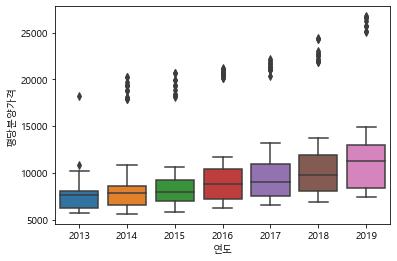

In [141]:
# 연도별 평당분양가격 boxplot
sns.boxplot(data=df, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

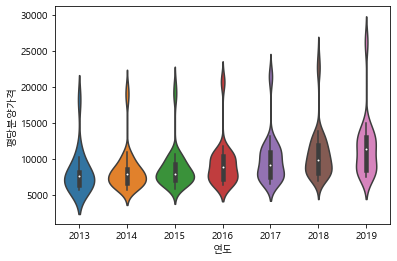

In [142]:
# 연도별 평당분양가격 violinplot
sns.violinplot(data=df, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

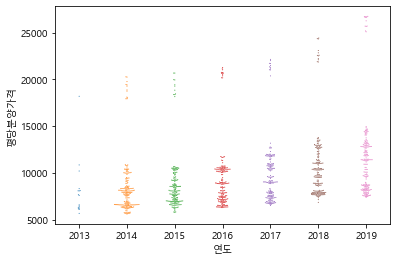

In [144]:
# 연도별 평당분양가격 swarmplot 
sns.swarmplot(data=df, x="연도", y="평당분양가격", size=1)

# 지역별 평당분양가격

In [147]:
gm = df.groupby(["지역명"])["평당분양가격"].mean().sort_values(ascending=False)
gm.index

Index(['서울', '경기', '부산', '인천', '대구', '제주', '울산', '세종', '대전', '광주', '경남', '경북',
       '충남', '강원', '충북', '전북', '전남'],
      dtype='object', name='지역명')

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

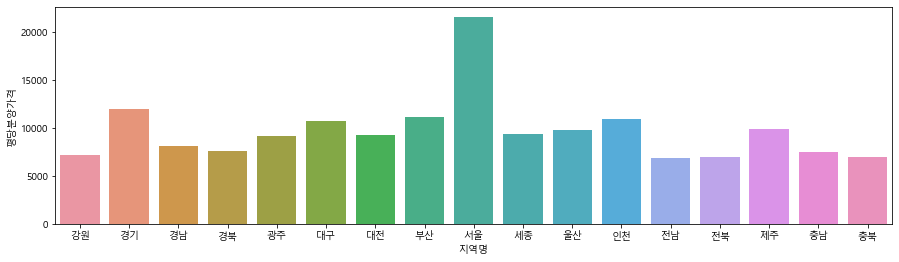

In [151]:
# barplot
plt.figure(figsize=(15, 4))
sns.barplot(data=df.sort_values("지역명"), x="지역명", y="평당분양가격", ci=None)

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

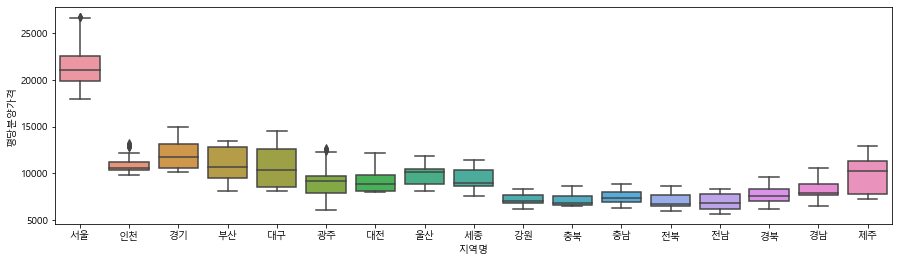

In [152]:
# 지역별 평당분양가격 boxplot
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

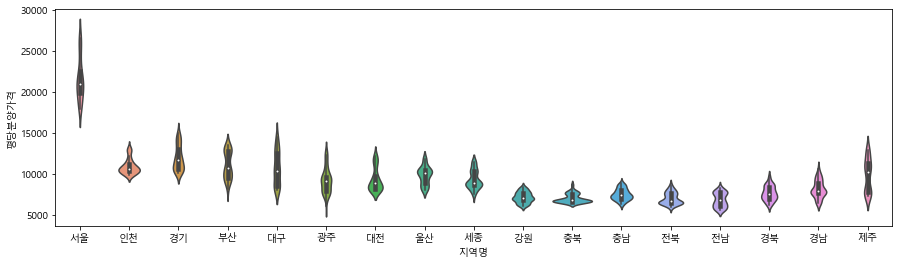

In [153]:
# 지역별 평당분양가격 violinplot
plt.figure(figsize=(15, 4))
sns.violinplot(data=df, x="지역명", y="평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

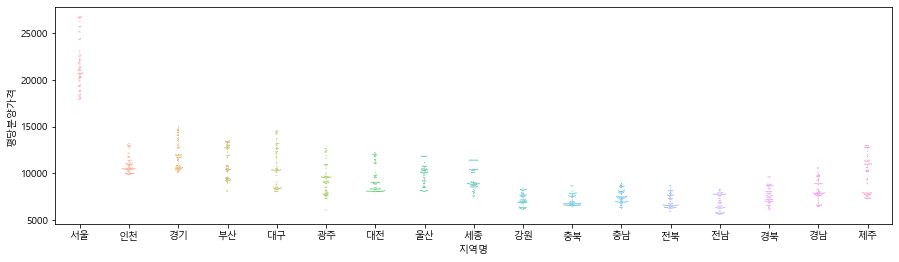

In [154]:
# 지역별 평당분양가격 swarmplot
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df, x="지역명", y="평당분양가격", size=1)